In [27]:
import numpy as np
import matplotlib.pylab as plt
import healpy as hp
from lsst.sims.featureScheduler.modelObservatory import Model_observatory
from lsst.sims.featureScheduler.schedulers import Core_scheduler
from lsst.sims.featureScheduler.utils import standard_goals, calc_norm_factor
import lsst.sims.featureScheduler.basis_functions as bf
from lsst.sims.featureScheduler.surveys import (generate_dd_surveys, Greedy_survey,
                                                Blob_survey)
%matplotlib inline
from lsst.sims.utils import hpid2RaDec

In [3]:
nside=32
target_map = standard_goals(nside=nside)

In [8]:
tm_summ = target_map['g']*0
for tm in target_map:
    tm_summ += target_map[tm]

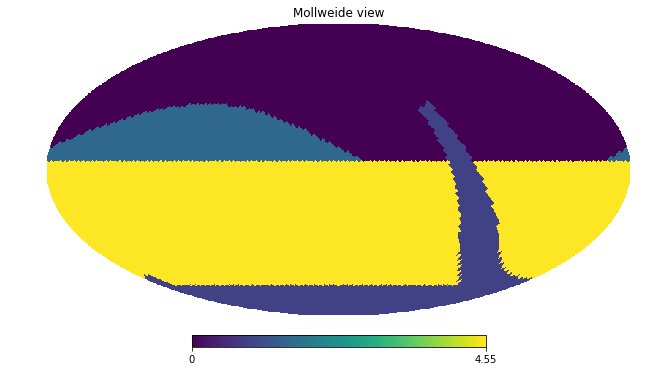

In [9]:
hp.mollview(tm_summ)

In [10]:
# ok, this isnlt going to be perfect because of the unequal distribution above of dec=0, but let's try
tm_a = np.cumsum(tm_summ)

In [19]:
sections = 3
sum_per_sec = np.max(tm_a)/sections
sum_vals = np.arange(sections+1)*sum_per_sec

In [24]:
hpids = []
for val in sum_vals:
    good = np.where(tm_a <= val)[0]
    hpids.append( np.max(good))
    

In [25]:
hpids

[2729, 7389, 9530, 12287]

In [28]:
ra, dec = hpid2RaDec(nside, hpids)

In [29]:
dec

array([ 34.22886633, -12.02469918, -32.7971683 , -88.53802884])